<a href="https://colab.research.google.com/github/krkshah/Global-Terrorism-data-analysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

We have used Seaborn, matplotlin, scipy,plotly libraries and colab has inbuit matplotlib verstion of 3.2.2 and we have needed 3.4 version or more to use some advance features

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.options.mode.chained_assignment = None 

In [ ]:
# importing the modules
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
from scipy.interpolate import interp1d
from plotnine import *
import altair as alt
import plotly.graph_objects as go

DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.we have set low_memory=False.


In [ ]:
file_path = '/content/drive/MyDrive/AlmabetterData/CapstoneProjects/EDAProject/GlobalTerrorismData.csv'
df=pd.read_csv(file_path, encoding = "ISO-8859-1",low_memory = False)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(100)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

Data Frame last 5 rows (tail)

In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

Shape of the Data Frame

In [ ]:
print(df.shape)

(181691, 135)


Columns of the Data Frame

In [ ]:
print(f'Columns in the Data Frame', df.columns.tolist())

Columns in the Data Frame ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'cla

Renaming specified columns

In [ ]:

df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','location':'Location','summary':'Summary','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','natlty1_txt':'Nationality','gname':'Gang_name','weaptype1_txt':'Weapon_type','nkill':'number of people killed'})

Finding out the missing values from the specified columns

In [ ]:
new_df=df[['Year','Month','Day','Country','Region','State','City','latitude','longitude','Attack_type','Target_type','Target_subtype','Nationality','Gang_name','Weapon_type','number of people killed']]
new_df.sort_values('Year',ascending=True, inplace=True, na_position='last', ignore_index=True, key=None)
new_df.isnull().sum() #df.isna().sum()

Year                           0
Month                          0
Day                            0
Country                        0
Region                         0
State                        421
City                         434
latitude                    4556
longitude                   4557
Attack_type                    0
Target_type                    0
Target_subtype             10373
Nationality                 1559
Gang_name                      0
Weapon_type                    0
number of people killed    10313
dtype: int64

In [ ]:
new_df.loc[:, new_df.isna().any()]

,State,City,latitude,longitude,Target_subtype,Nationality,number of people killed
0,NaN,Santo Domingo,18.456792,-69.951164,Named Civilian,Dominican Republic,1.0
1,New York,New York City,40.697132,-73.931351,Bank/Commerce,United States,0.0
2,Wisconsin,Sparta,43.939135,-90.820369,Electricity,United States,0.0
3,Wisconsin,Sparta,43.939135,-90.820369,Telephone/Telegraph,United States,0.0
4,California,San Francisco,37.755363,-122.443352,Military Barracks/Base/Headquarters/Checkpost,United States,0.0
...,...,...,...,...,...,...,...
181686,Corsica,Corte,42.306327,9.150712,Bank/Commerce,Corsica,0.0
181687,Corsica,Biguglia,42.631102,9.438257,Bank/Commerce,Corsica,0.0
181688,Norte de Santander,Vetas,8.891312,-72.848592,Military Transportation/Vehicle (excluding con...,Colombia,1.0
181689,Narathiwat,Bacho district,6.548956,101.638533,NaN,Thailand,0.0


Filling out missing values in the 'State' column

In [ ]:
new_df['State']=new_df['State'].fillna("Unknown")

Filling out missing values in the 'City' column

In [ ]:
new_df['City']=new_df['City'].fillna("Unknown")

Filling out missing values in the 'Target_subtype' column

In [ ]:
new_df['Target_subtype']=new_df['Target_subtype'].fillna("Others")

Filling out missing values in the 'Nationality' column

In [ ]:
new_df['Nationality']=new_df['Nationality'].fillna("Others")

Filling out missing values in the 'number of people killed' column, wherever the data is missing/NaN, we have treated it as 0 people killed in that specific attack

In [ ]:
new_df['number of people killed']=new_df['number of people killed'].fillna(0)

Revised DataFrame after dealing with modified values

In [ ]:
new_df.isnull().sum()

Year                          0
Month                         0
Day                           0
Country                       0
Region                        0
State                         0
City                          0
latitude                   4556
longitude                  4557
Attack_type                   0
Target_type                   0
Target_subtype                0
Nationality                   0
Gang_name                     0
Weapon_type                   0
number of people killed       0
dtype: int64

We want to establish the locations of each attack based on latitude and longitude values, there are about 4500 cases where latitude and longitude details are not given. In order to pinpoint each location, we need the details. Hence, we opted to drop the missing values.

In [ ]:
Terror_attacks_df=new_df[['City',	'latitude',	'longitude']]
Terror_attacks_df=Terror_attacks_df.dropna()
Terror_attacks_df.drop(Terror_attacks_df.loc[Terror_attacks_df['City']=='Unknown'].index, inplace=True)
Terror_attacks_df=Terror_attacks_df.reset_index()
Terror_attacks_df.drop(['index'], axis=1)
Terror_attacks_df=Terror_attacks_df.groupby(['latitude',	'longitude']).size().reset_index(name="Ocuurances").sort_values(by=["Ocuurances"], ascending=False).reset_index().drop(['index'],axis=1)
Terror_attacks_df

,latitude,longitude,Ocuurances
0,33.303566,44.371773,7521
1,24.891115,67.143311,2686
2,-11.967368,-76.978462,2401
3,36.354145,43.143570,2247
4,54.607712,-5.956210,2189
...,...,...,...
46851,16.543576,121.849185,1
46852,16.544919,-90.419653,1
46853,16.546944,42.979444,1
46854,16.552261,42.953253,1


In [ ]:
list1=Terror_attacks_df.Ocuurances.values.tolist()
m=interp1d([1,max(list1)],[1,3])
circle_radius=m(list1)
fig=px.density_mapbox(Terror_attacks_df,lat='latitude',lon='longitude',radius=circle_radius,zoom=0,mapbox_style='carto-positron',width=800, height=800,title='Frequency of Attacks all over the world')
# show the plot
fig.show()
#zoom-in/zoom-out on the garph is required

We have displayed attacks happening all over the world at a glance and we can conclude that most attcks are happening in Middle east, Africa and South asian regions

In [ ]:
# Creating(df)
Region_df=new_df['Region'].value_counts().head(10).to_frame().reset_index().rename(columns = {'index':'Region','Region':'Occurances'}, inplace = False)
Region_df['Percentage']=np.round((Region_df['Occurances']/Region_df['Occurances'].sum())*100,2)
Region_df['Cum_Percentage']=Region_df['Percentage'].cumsum()
Region_df

,Region,Occurances,Percentage,Cum_Percentage
0,Middle East & North Africa,50474,27.91,27.91
1,South Asia,44974,24.87,52.78
2,South America,18978,10.49,63.27
3,Sub-Saharan Africa,17550,9.70,72.97
4,Western Europe,16639,9.20,82.17
5,Southeast Asia,12485,6.90,89.07
6,Central America & Caribbean,10344,5.72,94.79
7,Eastern Europe,5144,2.84,97.63
8,North America,3456,1.91,99.54
9,East Asia,802,0.44,99.98


Number of occurances of attacks in each region is calculated and metioned in Region_df (Data Frame)

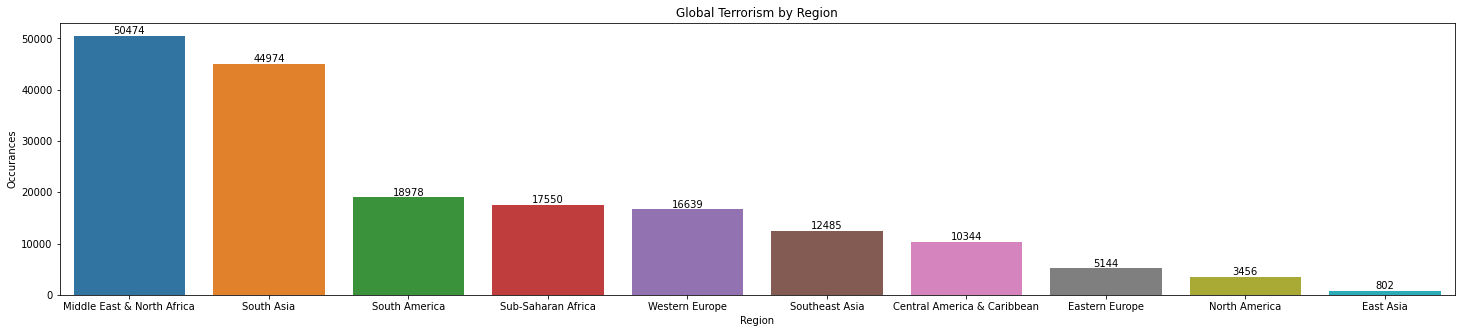

In [ ]:
# bar plot
plt.figure(figsize=(25,5))
Region_barplot=sns.barplot(data=Region_df, x='Region', y="Occurances")
Region_barplot.bar_label(Region_barplot.containers[0])
# set the title
plt.title('Global Terrorism by Region')    
# show the plot
plt.show()

The Middle East & North Africa region has witnessed the most number of attacks followed by South Asia and South America

In [ ]:
# Creating(df)
Country_df=new_df['Country'].value_counts().head(10).reset_index().rename(columns = {'index':'Country','Country':'Occurances'}, inplace = False)
Country_df

,Country,Occurances
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Number of occurrences of attacks in each country is calculated and the top ten most affected countries are mentioned in Country_df (Data Frame)

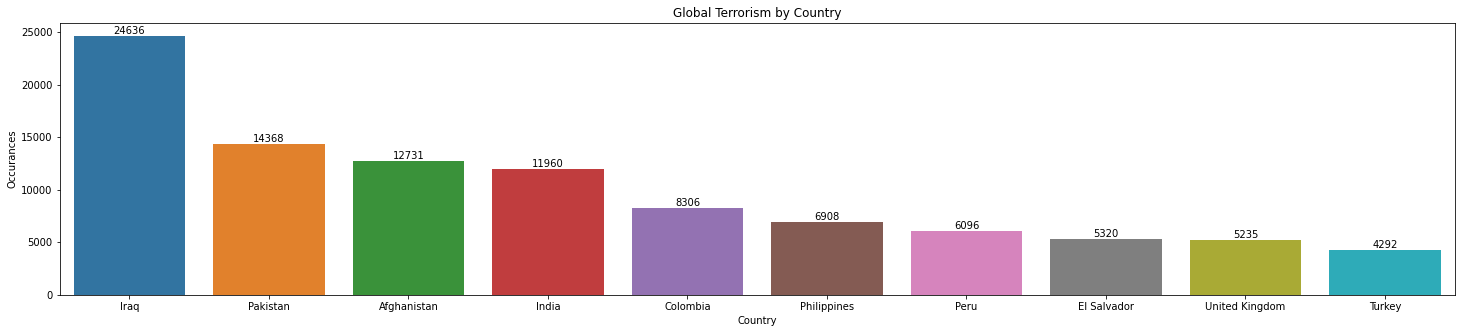

In [ ]:
# bar plot
plt.figure(figsize=(25,5))
Country_barplot=sns.barplot(data=Country_df, x='Country', y="Occurances")
Country_barplot.bar_label(Country_barplot.containers[0])
# set the title
plt.title('Global Terrorism by Country')
# show the plot
plt.show() 

Iraq has witnessed the most number of attacks followed by Pakistan and Afghanistan 

In [ ]:
country_list=Country_df['Country'].to_list()
country_list

['Iraq',
 'Pakistan',
 'Afghanistan',
 'India',
 'Colombia',
 'Philippines',
 'Peru',
 'El Salvador',
 'United Kingdom',
 'Turkey']

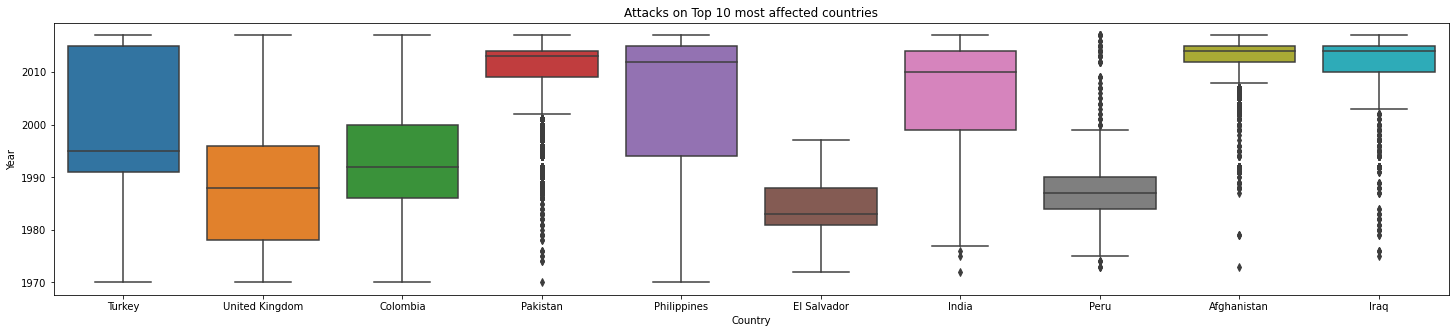

In [ ]:
# box plot
new_df2=new_df.loc[new_df['Country'].isin(country_list)]
new_df2=new_df2[['Country','Year']].reset_index().drop(["index"], axis=1, inplace=False)
plt.figure(figsize=(25,5))
sns.boxplot(x ='Country', y = 'Year', data = new_df2)
# set the title
plt.title('Attacks on Top 10 most affected countries')
# show the plot
plt.show()

The left and right sides of the box are the lower and upper quartiles. The box covers the interquartile interval, where 50% of the data is found. The vertical line that split the box in two is the median.

Iraq, Pakistan, Afghanistan, India and the Philippines data is skewed towards 2017 thereby indicates these countries are currently experiencing Terrorist activities whereas countries like the UK, Columbia, Turkey, El Salvador and Peru experienced attacks in the past.

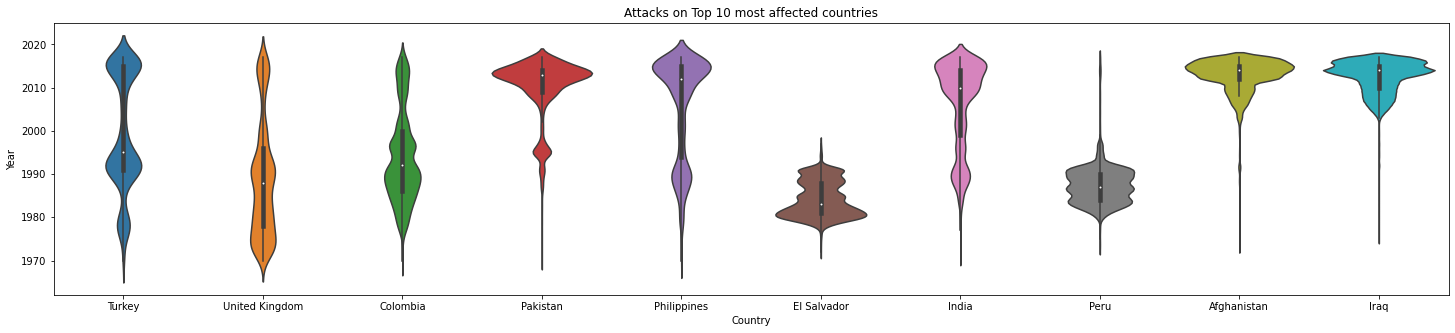

In [ ]:
#Violin plot
new_df2=new_df.loc[new_df['Country'].isin(country_list)]
new_df2=new_df2[['Country','Year']].reset_index().drop(["index"], axis=1, inplace=False)
plt.figure(figsize=(25,5))
sns.violinplot(x ='Country', y = 'Year', data = new_df2)
# set the title
plt.title('Attacks on Top 10 most affected countries')
# show the plot
plt.show()

Similar to the box plot we can also deduct the same information from here, we can identify the string of attacks happening the country. The more the width of violin shape indicates the significant growth in the number of attacks in a short duration. We can see identify the number of terrorist attacks are reducing in most of the countries.

In [ ]:
# Creating(df)
State_df=new_df['State'].value_counts().head(11).to_frame().reset_index().rename(columns = {'index':'State','State':'Ocuurances'}, inplace = False).drop([1], axis=0).reset_index().drop(['index'],axis=1)
State_df

,State,Ocuurances
0,Baghdad,7645
1,Northern Ireland,4498
2,Balochistan,3710
3,Saladin,3411
4,Al Anbar,3299
5,Nineveh,3241
6,Sindh,3206
7,Khyber Pakhtunkhwa,3084
8,Diyala,3041
9,Lima,2615


Number of occurances of attacks in each State is calculated and top ten most affected states in the world are metioned in State_df (Data Frame)

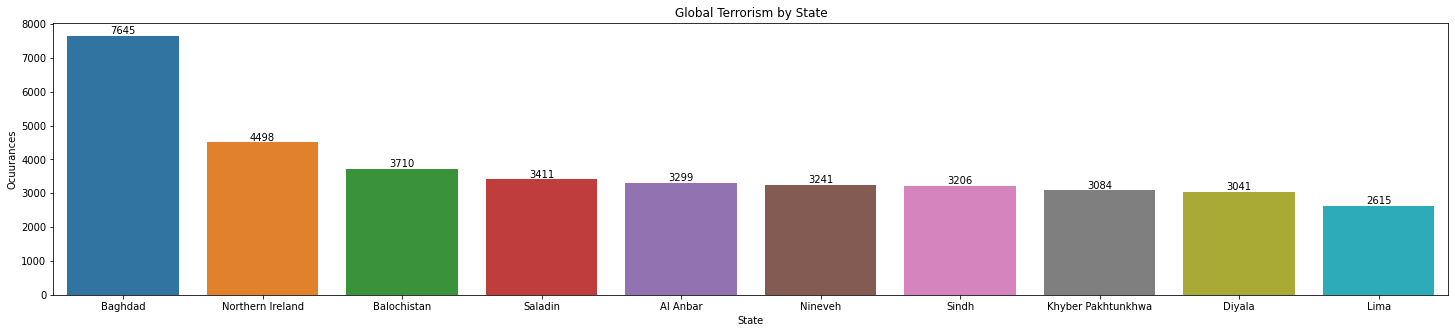

In [ ]:
# bar plot
plt.figure(figsize=(25,5))
State_barplot=sns.barplot(data=State_df, x='State', y="Ocuurances")
State_barplot.bar_label(State_barplot.containers[0])
# set the title
plt.title('Global Terrorism by State')   
# show the plot 
plt.show()

Baghdad has witnessed most number of attacks followed by Northern Ireland and Balochistan 

In [ ]:
# Creating(df)
City_df=new_df['City'].value_counts().head(11).to_frame().reset_index().rename(columns = {'index':'City','City':'Ocuurances'}, inplace = False).drop([0], axis=0).reset_index().drop(['index'],axis=1)
City_df

,City,Ocuurances
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
5,Santiago,1621
6,Mogadishu,1581
7,San Salvador,1558
8,Istanbul,1048
9,Athens,1019


Number of occurances of attacks in each City is calculated and top ten most affected cities in the world are metioned in City_df (Data Frame)

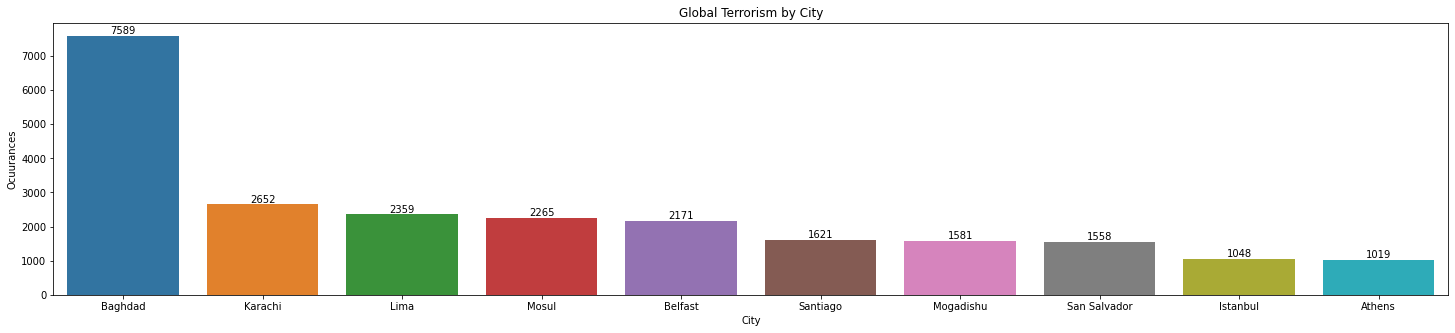

In [ ]:
# bar plot
plt.figure(figsize=(25,5))
City_barplot=sns.barplot(data=City_df, x='City', y="Ocuurances")
City_barplot.bar_label(City_barplot.containers[0])
# set the title
plt.title('Global Terrorism by City')  
# show the plot   
plt.show()

Baghdad has witnessed the most number of attacks follwed by Karachi and Lima 

In [ ]:
# Creating(df)
Terrorism_by_year_df=new_df['Year'].value_counts().to_frame().reset_index().rename(columns = {'index':'Year','Year':'Ocuurances'}, inplace = False).reset_index().drop(['index'],axis=1)
Terrorism_by_year_df.head()

,Year,Ocuurances
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900


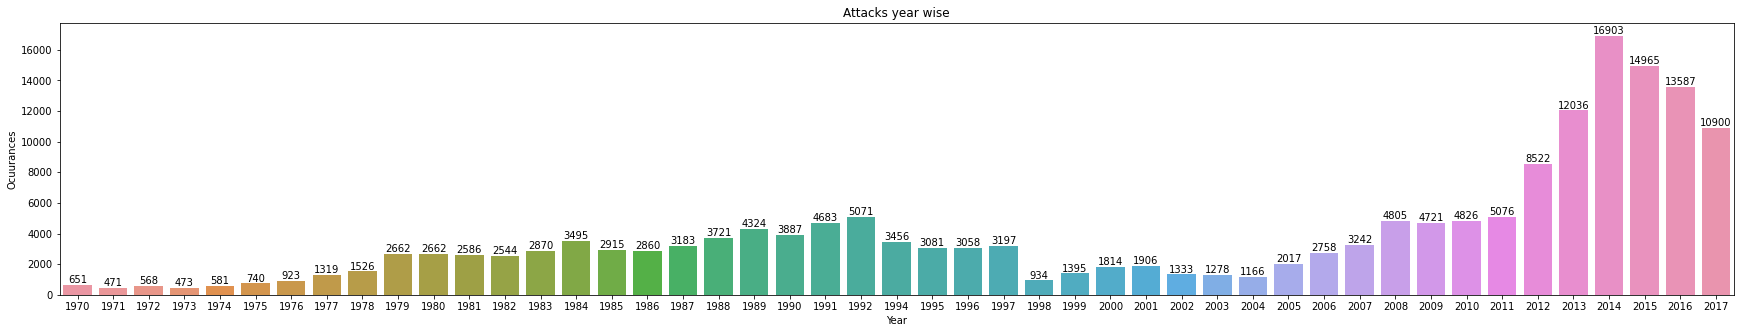

In [ ]:
#bar plot
plt.figure(figsize=(30,5))
Terrorism_by_year_df_barplot=sns.barplot(data=Terrorism_by_year_df, x='Year', y="Ocuurances")
Terrorism_by_year_df_barplot.bar_label(Terrorism_by_year_df_barplot.containers[0])
# set the title
plt.title('Attacks year wise')    
# show the plot
plt.show()

A significant increase in the number of attacks can be seen from 2011 to 2014 and there is a reduction in the number of attacks thereafter

In [ ]:
Terrorism_by_month_df=new_df[new_df['Year'] >= 2008]['Month'].value_counts().to_frame().reset_index().rename(columns = {'index':'Month','Month':'Ocuurances'}, inplace = False).sort_values(by=['Month']).reset_index().drop(['index'],axis=1)
Terrorism_by_month_df['Month'] = pd.to_datetime(Terrorism_by_month_df['Month'], format='%m').dt.month_name()
Terrorism_by_month_df
Terrorism_by_month_df_sty=Terrorism_by_month_df.style.highlight_max(axis=0, props='background-color:red;', subset=['Ocuurances']).highlight_min(axis=0, props='background-color:green;', subset=['Ocuurances'])
Terrorism_by_month_df_sty

,Month,Ocuurances
0,January,7908
1,February,7249
2,March,7812
3,April,8167
4,May,9201
5,June,8154
6,July,8829
7,August,8237
8,September,7364
9,October,8004


In [ ]:
Terrorism_by_month_df.describe().style.format(precision=2)

,Ocuurances
count,12.00
mean,8028.42
std,583.75
min,7249.00
25%,7700.00
50%,8061.50
75%,8184.50
max,9201.00


In [ ]:
Terrorism_by_month_df[Terrorism_by_month_df['Ocuurances']>=Terrorism_by_month_df['Ocuurances'].quantile(q=0.75)].reset_index().drop('index', axis=1)

,Month,Ocuurances
0,May,9201
1,July,8829
2,August,8237


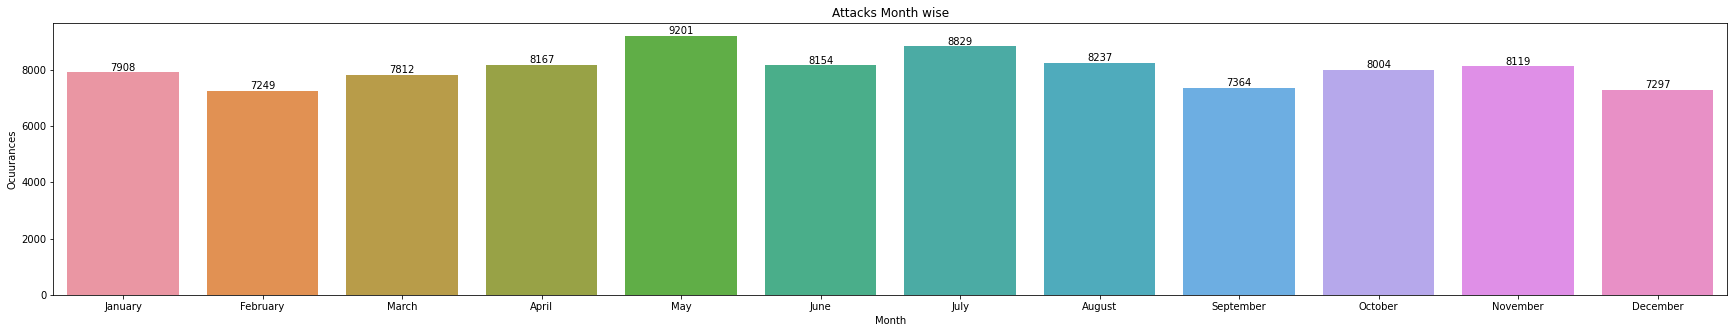

In [ ]:
#bar plot
plt.figure(figsize=(30,5))
Terrorism_by_month_df_barplot=sns.barplot(data=Terrorism_by_month_df, x='Month', y="Ocuurances")
Terrorism_by_month_df_barplot.bar_label(Terrorism_by_month_df_barplot.containers[0])
# set the title
plt.title('Attacks Month wise')    
# show the plot
plt.show()

As we can see 75th percentile value is 8184.50, and the attacks in the months of April, May, June, July, August, October, and November are almost equal to or above the 75th percentile. Extra security measures are to be taken during these months with emphasis on May, July August.

In [ ]:
Terrorism_by_day_df=new_df[new_df['Year'] >= 2008]['Day'].value_counts().to_frame().reset_index().rename(columns = {'index':'Day','Day':'Ocuurances'}, inplace = False).sort_values(by=['Day']).reset_index().drop(['index'],axis=1).drop(0)
Terrorism_by_day_df_sty=Terrorism_by_day_df.style.highlight_max(axis=0, props='background-color:red;', subset=['Ocuurances']).highlight_min(axis=0, props='background-color:green;', subset=['Ocuurances'])
Terrorism_by_day_df_sty

,Day,Ocuurances
1,1,3115
2,2,3083
3,3,3184
4,4,3209
5,5,3161
6,6,3056
7,7,3194
8,8,3201
9,9,3173
10,10,3147


In [ ]:
Terrorism_by_day_df.describe().style.format(precision=2)

,Day,Ocuurances
count,31.00,31.00
mean,16.00,3104.16
std,9.09,261.09
min,1.00,1791.00
25%,8.50,3087.50
50%,16.00,3158.00
75%,23.50,3197.50
max,31.00,3422.00


In [ ]:
Terrorism_by_day_df[Terrorism_by_day_df['Ocuurances']>=Terrorism_by_day_df['Ocuurances'].quantile(q=0.75)].reset_index().drop('index', axis=1)

,Day,Ocuurances
0,4,3209
1,8,3201
2,11,3243
3,13,3211
4,14,3218
5,15,3422
6,21,3207
7,27,3262


Extra Security Measures on 4,8,11,13,14,15,21,27 of each month has to be taken.

In [ ]:
# Creating(df)
Attack_type_df=new_df['Attack_type'].value_counts().head(10).to_frame().reset_index().rename(columns = {'index':'Attack_type','Attack_type':'Occurances'}, inplace = False).reset_index().drop(['index'],axis=1)
Attack_type_df['Percentage']=np.round((Attack_type_df['Occurances']/Attack_type_df['Occurances'].sum())*100,2)
Attack_type_df['Cum_Percentage']=Attack_type_df['Percentage'].cumsum()
Attack_type_df

,Attack_type,Occurances,Percentage,Cum_Percentage
0,Bombing/Explosion,88255,48.57,48.57
1,Armed Assault,42669,23.48,72.05
2,Assassination,19312,10.63,82.68
3,Hostage Taking (Kidnapping),11158,6.14,88.82
4,Facility/Infrastructure Attack,10356,5.70,94.52
5,Unknown,7276,4.00,98.52
6,Unarmed Assault,1015,0.56,99.08
7,Hostage Taking (Barricade Incident),991,0.55,99.63
8,Hijacking,659,0.36,99.99


Top ten attack types has been calculated and a dataframe regarding the same is created.

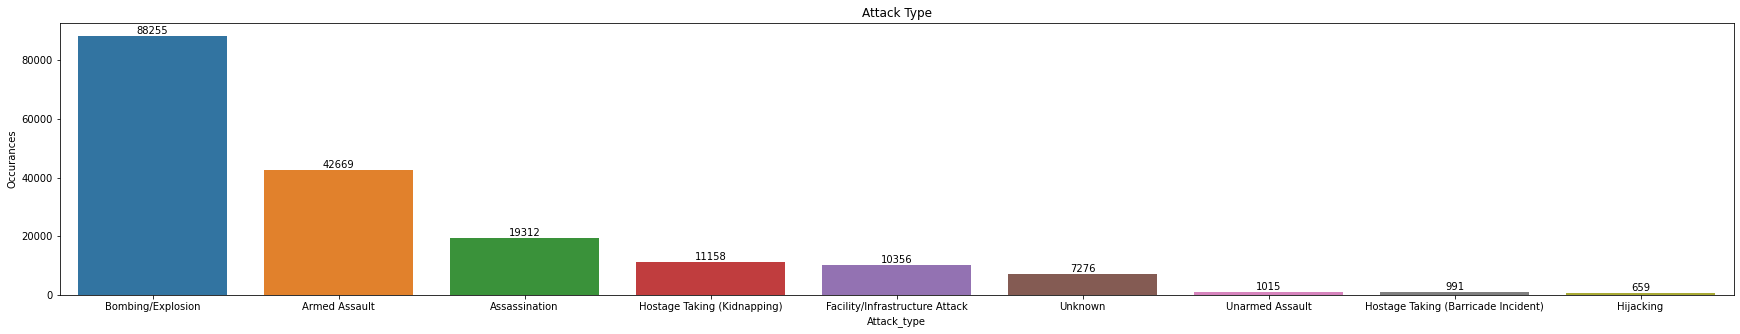

In [ ]:
# bar plot
plt.figure(figsize=(30,5))
Attack_type_barplot=sns.barplot(data=Attack_type_df, x='Attack_type', y='Occurances')
Attack_type_barplot.bar_label(Attack_type_barplot.containers[0])
# set the title
plt.title('Attack Type')
# show the plot     
plt.show()

Bombing/Explosion is significant attack type followed by Armed Assault and Assassination

In [ ]:
# Creating data frame
Gang_Name_df=new_df['Gang_name'].value_counts().dropna().head(11).to_frame().reset_index().rename(columns = {'index':'Gang_name','Gang_name':'Number of Attacks'}, inplace = False).drop([0]).reset_index().drop(['index'],axis=1)
l2=Gang_Name_df['Gang_name'].to_list()
l2

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Farabundo Marti National Liberation Front (FMLN)',
 'Al-Shabaab',
 "New People's Army (NPA)",
 'Irish Republican Army (IRA)',
 'Revolutionary Armed Forces of Colombia (FARC)',
 'Boko Haram',
 "Kurdistan Workers' Party (PKK)"]

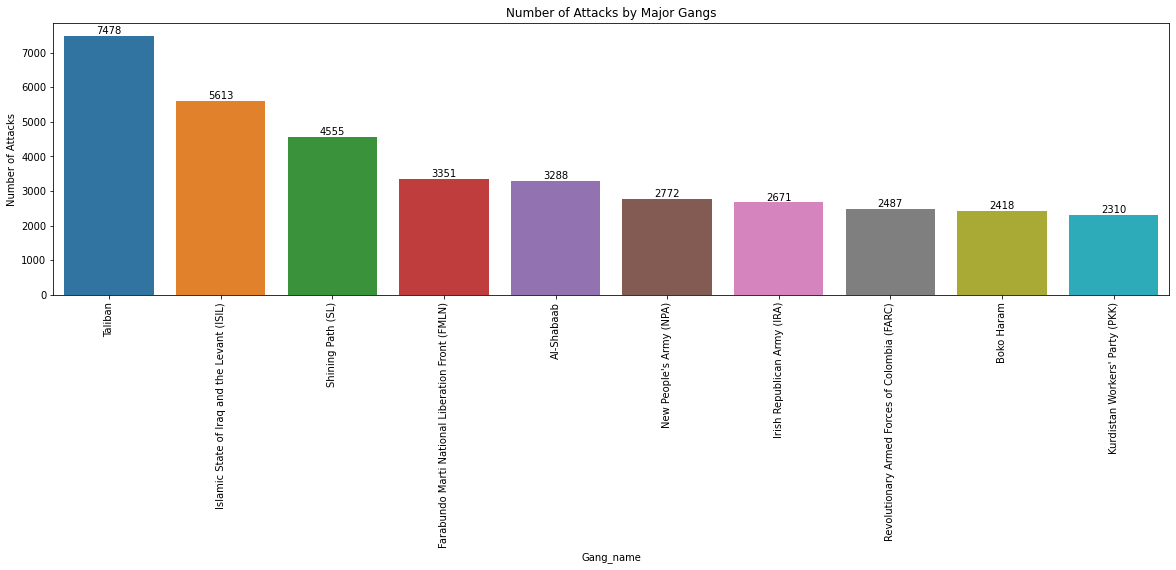

In [ ]:
# Bar plot
plt.figure(figsize=(20,5))
Gang_Name_barplot=sns.barplot(data=Gang_Name_df, x='Gang_name', y="Number of Attacks")
Gang_Name_barplot.bar_label(Gang_Name_barplot.containers[0])
plt.xticks(rotation = 'vertical')
# set the title
plt.title('Number of Attacks by Major Gangs')
# show the plot
plt.show()


Taliban has conducted the most number of terror attacks followed by ISIL and SL.

In [ ]:
# Creating data frame
Gang_attacks_df=new_df.groupby('Gang_name',axis=0)['Year'].value_counts().rename('Occurances').to_frame().reset_index()
Gang_attacks_df

,Gang_name,Year,Occurances
0,1 May,1989,4
1,1 May,1991,3
2,1 May,1992,3
3,14 K Triad,1998,4
4,14 March Coalition,2008,1
...,...,...,...
9033,Zulu Miners,1994,1
9034,Zuwar al-Imam Rida,2013,1
9035,Zviadists,1998,1
9036,Zwai Tribe,2013,1


In [ ]:
Gang_attacks_df=Gang_attacks_df[Gang_attacks_df["Occurances"] != 0]
Gang_attacks_df=Gang_attacks_df[Gang_attacks_df['Gang_name'].isin(l2)]
Gang_attacks_df=Gang_attacks_df.groupby(['Gang_name','Year'])['Occurances'].sum().reset_index()
Gang_attacks_df1=Gang_attacks_df.pivot('Gang_name','Year','Occurances').transpose().fillna(0)
Gang_attacks_df1.head()

Gang_name,Al-Shabaab,Boko Haram,Farabundo Marti National Liberation Front (FMLN),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),New People's Army (NPA),Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Taliban
Year,,,,,,,,,,
1970,0.0,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,60.0,0.0,0.0,1.0,0.0,0.0,0.0
1972,0.0,0.0,0.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#lineplot
fig = go.Figure()

for column in Gang_attacks_df1.columns.to_list():
    fig.add_trace(
        go.Scatter(
            x =Gang_attacks_df1.index,
            y = Gang_attacks_df1[column],
            name = column
            
        )
    )
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True, True,True, True, True, True, True, True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'Al-Shabaab',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Al-Shabaab',
                           'showlegend':True}]),
              dict(label = 'Boko Haram',
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Boko Haram',
                           'showlegend':True}]),
             dict(label = 'Farabundo Marti National Liberation Front (FMLN)',
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Farabundo Marti National Liberation Front (FMLN)',
                           'showlegend':True}]),
             dict(label = 'Irish Republican Army (IRA)',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Irish Republican Army (IRA)',
                           'showlegend':True}]),
             dict(label = 'Islamic State of Iraq and the Levant (ISIL)',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, True, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Islamic State of Iraq and the Levant (ISIL)',
                           'showlegend':True}]),
             dict(label = "Kurdistan Workers' Party (PKK)",
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, True, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': "Kurdistan Workers' Party (PKK)",
                           'showlegend':True}]),
             dict(label = "New People's Army (NPA)",
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False,  True, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': "New People's Army (NPA)",
                           'showlegend':True}]),
             dict(label = 'Revolutionary Armed Forces of Colombia (FARC)',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False,  True, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Revolutionary Armed Forces of Colombia (FARC)',
                           'showlegend':True}]),
             dict(label = 'Shining Path (SL)',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False,  False, True, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Shining Path (SL)',
                           'showlegend':True}]),
             dict(label = 'Taliban',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False, False,  False, True]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Taliban',
                           'showlegend':True}]),
         
             
   ])
        )
    ])

fig.show()

In [ ]:
# Creating data frame
Weapon_type_df=new_df['Weapon_type'].value_counts().dropna().head(10).to_frame().reset_index().rename(columns = {'index':'Weapon_type','Weapon_type':'Number of Attacks'}, inplace = False).drop([0]).reset_index().drop(['index'],axis=1)
Weapon_type_df

,Weapon_type,Number of Attacks
0,Firearms,58524
1,Unknown,15157
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35


Top ten weapon types used in terror attacks has been calculated

In [ ]:
#pie plot
fig = px.pie(Weapon_type_df, values='Number of Attacks', names='Weapon_type', title='Major Weapons used for Attacks', width=1000, height=400)
# show the plot
fig.show()

Around 65% of attacks in the world are caused by firearms. 

In [ ]:
#Creating df
Target_type_df=new_df['Target_type'].value_counts().dropna().head(10).to_frame().reset_index().rename(columns = {'index':'Target_type','Target_type':'Number of People'}, inplace = False)
Target_type_df

,Target_type,Number of People
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


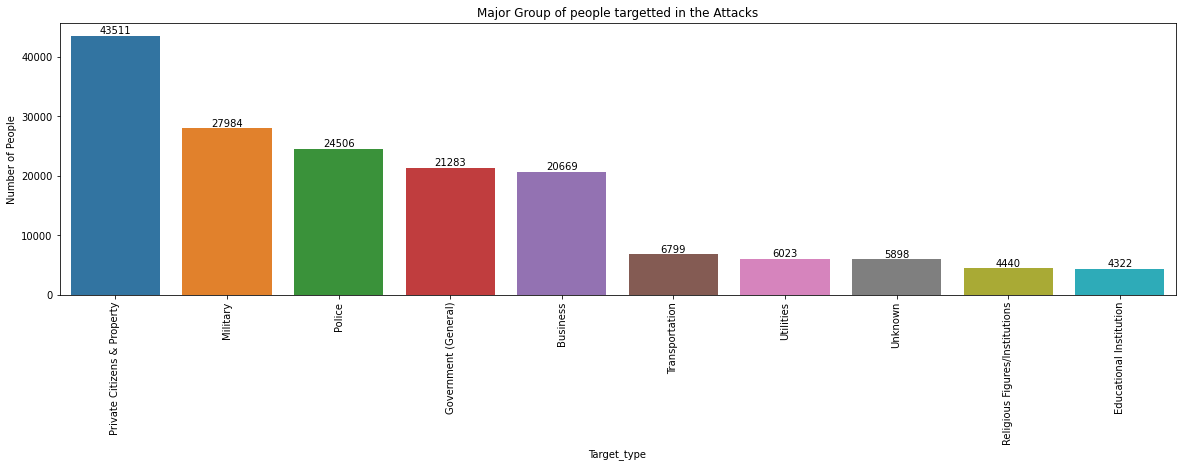

In [ ]:
plt.figure(figsize=(20,5))
fig = px.pie(Target_type_df, values='Number of People', names='Target_type', title='Major Group of people targetted in the Attacks', width=1180, height=400)
# show the plot
fig.show()
People_targetted_barplot=sns.barplot(data=Target_type_df, x='Target_type', y="Number of People")
People_targetted_barplot.bar_label(People_targetted_barplot.containers[0])
plt.xticks(rotation = 'vertical')
# set the title
plt.title('Major Group of people targetted in the Attacks')
# show the plot
plt.show()


Private citizens & property is being targeted by terrorists followed by Military people and Police personal

In [ ]:
#Creating data frame(df)
new_df3=new_df.loc[new_df['Country'].isin(country_list)]
new_df3=new_df3[['Country','Year','number of people killed']].reset_index().drop(["index"], axis=1, inplace=False)
new_df3=new_df3[new_df3["number of people killed"] != 0]
new_df3=new_df3.groupby(['Country','Year'])['number of people killed'].sum().reset_index()
new_df3=new_df3.pivot('Country','Year','number of people killed').transpose().fillna(0)
new_df3.head()

Country,Afghanistan,Colombia,El Salvador,India,Iraq,Pakistan,Peru,Philippines,Turkey,United Kingdom
Year,,,,,,,,,,
1970,0.0,0.0,0.0,0.0,0.0,4.0,0.0,41.0,0.0,20.0
1971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,110.0
1972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,368.0
1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.0
1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,235.0


In [ ]:
fig = go.Figure()

for column in new_df3.columns.to_list():
    fig.add_trace(
        go.Scatter(
            x = new_df3.index,
            y = new_df3[column],
            name = column
            
        )
    )
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True, True,True, True, True, True, True, True, True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'Afghanistan',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False, False, False, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Afghanistan',
                           'showlegend':True}]),
              dict(label = 'Colombia',
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False, False, False, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Colombia',
                           'showlegend':True}]),
             dict(label = 'El Salvador',
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False, False, False, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'El Salvador',
                           'showlegend':True}]),
             dict(label = 'India',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False, False, False, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'India',
                           'showlegend':True}]),
             dict(label = 'Iraq',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, True, False, False, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Iraq',
                           'showlegend':True}]),
             dict(label = 'Pakistan',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, True, False, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Pakistan',
                           'showlegend':True}]),
             dict(label = 'Peru',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False,  False, True, False, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Peru',
                           'showlegend':True}]),
             dict(label = 'Philippines',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False, True, False, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Philippines',
                           'showlegend':True}]),
             dict(label = 'Philippines',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False,  False, True, False,False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Philippines',
                           'showlegend':True}]),
             dict(label = 'Turkey',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False, False, False,True, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Turkey',
                           'showlegend':True}]),
             dict(label = 'United Kingdom',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, False, False, False, False, False, False,True]}, # the index of True aligns with the indices of plot traces
                          {'title': 'United Kingdom',
                           'showlegend':True}]), 
             
   ])
        )
    ])

fig.show()

Number of people killed during each year for the top ten most affected countries is plotted. There is significant reduction in the number of attacks when compared to 2014 but conditions in Iraq and Afghanistan remains alarming

In [ ]:
Number_of_people_killed_df=new_df[new_df['Year'] >= 2008].groupby(['Country'])["number of people killed"].sum().to_frame().sort_values(['number of people killed'], ascending=False).reset_index().head(10)
Number_of_people_killed_df['Percentage']=np.round((Number_of_people_killed_df['number of people killed']/Number_of_people_killed_df['number of people killed'].sum())*100,2)
Number_of_people_killed_df

,Country,number of people killed,Percentage
0,Iraq,60653.0,33.47
1,Afghanistan,35933.0,19.83
2,Nigeria,21784.0,12.02
3,Pakistan,17915.0,9.89
4,Syria,14698.0,8.11
5,Somalia,9430.0,5.20
6,Yemen,8613.0,4.75
7,India,5449.0,3.01
8,Democratic Republic of the Congo,3614.0,1.99
9,Philippines,3126.0,1.73


In [ ]:
fig = px.treemap(Number_of_people_killed_df, path=["Country"], values='number of people killed',
                  color='number of people killed',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(Number_of_people_killed_df['number of people killed']))
fig.update_layout(margin = dict(t=50, l=20, r=25, b=25))
fig.show()

More than 50% of causalities are from Iraq and Afghanistan.

Major findings in our Global Terrorism Analysis


1.   The Middle East & North Africa region has witnessed the most number of attacks followed by South Asia and South America.
2.   Iraq has witnessed the most number of attacks followed by Pakistan and Afghanistan. 
3.   Baghdad has witnessed the most number of attacks followed by Northern Ireland and Balochistan. 
4.Baghdad has witnessed the most number of attacks follwed by Karachi and Lima. 
5.Bombing/Explosion is significant attack type followed by Armed Assault and Assassination.
6.A significant increase in the number of attacks can be seen from 2011 to 2014 and there is a reduction in the number of attacks thereafter.
7.Maximum number of attacks are happening in the months of April, May, June, July, August, October, and November.
7.Taliban has conducted the most number of terror attacks followed by ISIL and SL.
8.Around 65% of attacks in the world are caused by firearms. 
9.Private citizens & property is being targeted by terrorists followed by Military people and Police personal.
10. Countries from the Middle East & North Africa and South Asia are currently witnessing major attacks in the world.
11. There is a significant increase in the number of attacks 2005 in the Middle East & North Africa and South Asian countries
12.Though the number of attacks all over the world are witnessing downfall the situation in Iraq, Afghanistan, Pakistan looks alarming.
13.More than 50% of deaths are occuring from Iraq and Afghanistan from 2008 to 2017.

Measures to be undertaken 

1.   Major cities in each contry needs an additinal security
2.Extra security measures are to be taken during April, May, June, July, August, October, and November.
3.Extra Security Measures on 4,8,11,13,14,15,21,27 of each month has to be taken.
2.   Firearms supply needs to be curtailed.
3. Terrorist organizations such Taliban, ISIL, SL etc are to monitored thoroughly.
4.Special measures has to be taken in Iraq and Afghanistan.




<Figure size 1800x360 with 0 Axes>

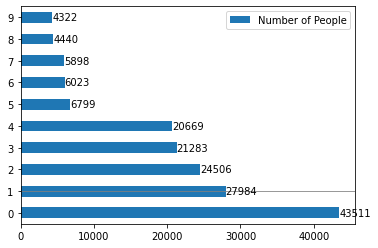

In [ ]:
plt.figure(figsize=(25,5))


ax =  Target_type_df.plot.barh()
ax.axhline(1, color='grey', linewidth=0.8)
ax.bar_label(ax.containers[0])
plt.show()



In [ ]:
Target_type_df

,Target_type,Number of People
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322
